<a href="https://colab.research.google.com/github/daniswara10/Deteksi_Titik_Sudut/blob/main/Deteksi_Titik_Sudut_Citra_Untuk_Identifikasi_Bentuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

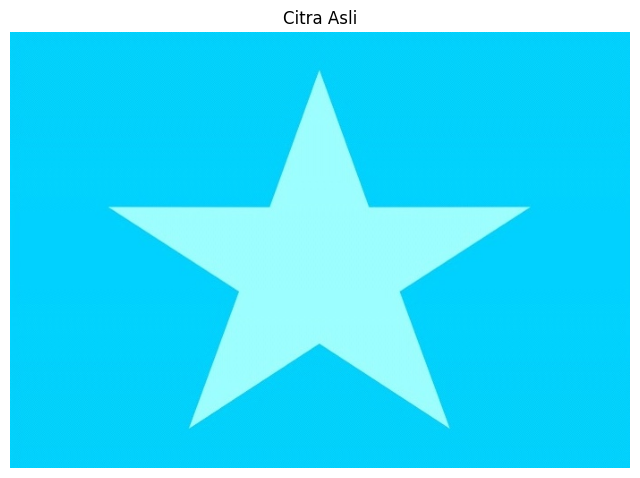

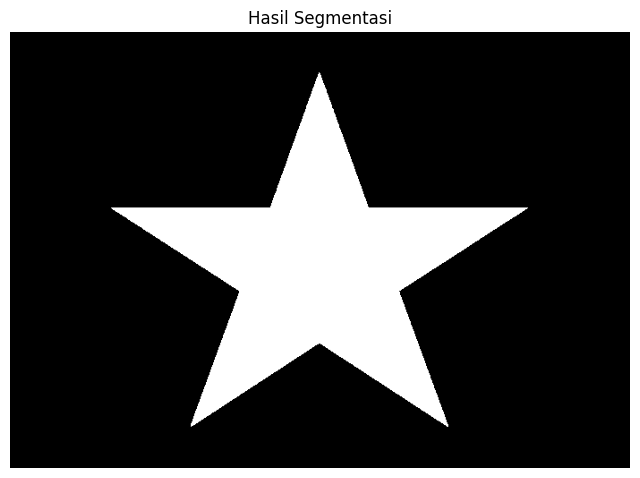

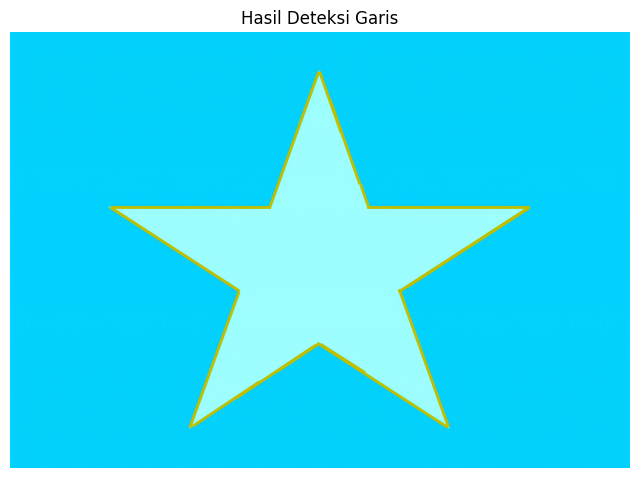

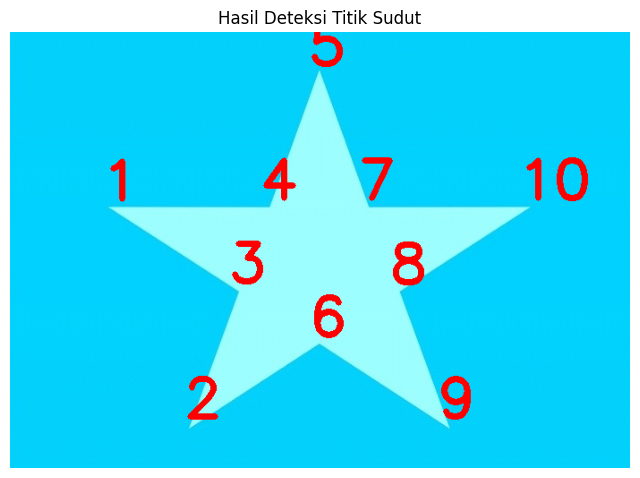

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca dan resize citra
I = cv2.imread('/content/bintang.jpg')
I = cv2.resize(I, (0, 0), fx=1, fy=1)

# Menampilkan citra asli
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')
plt.show()

# Segmentasi citra
gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 0.82 * 255, 255, cv2.THRESH_BINARY)
bw2 = cv2.Canny(bw, 50, 150)  # Menggunakan deteksi tepi Canny untuk menemukan perimeter

# Menampilkan citra hasil segmentasi
plt.figure(figsize=(8, 6))
plt.imshow(bw, cmap='gray')
plt.title('Hasil Segmentasi')
plt.axis('off')
plt.show()

# Deteksi garis dengan transformasi Hough
lines = cv2.HoughLinesP(bw2, 1, np.pi / 180, 20, minLineLength=20, maxLineGap=10)

# Menampilkan citra hasil deteksi garis
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Hasil Deteksi Garis')

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'y', linewidth=2)

plt.axis('off')
plt.show()

# Deteksi titik sudut
# Mengambil titik akhir dari garis
xy2 = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        xy2.extend([(x1, y1), (x2, y2)])

# Hapus titik yang terlalu dekat satu sama lain
def remove_close_points(points, threshold=90):
    unique_points = []
    for point in points:
        if all(np.linalg.norm(np.array(point) - np.array(other)) > threshold for other in unique_points):
            unique_points.append(point)
    return unique_points

xy2 = remove_close_points(xy2)

# Menambahkan teks pada titik sudut
for i, (x, y) in enumerate(sorted(xy2)):
    cv2.putText(I, str(i+1), (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)

# Menampilkan citra hasil deteksi titik sudut
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Hasil Deteksi Titik Sudut')
plt.axis('off')
plt.show()
